In [2]:
from datetime import datetime, timedelta

from stock_data_repo import StockDataRepo
from backtest import Backtester, BacktestResult
from strategies import MinVarianceAuxiliaryData, min_variance_portfolio

In [62]:
backtester = Backtester(datetime(2020, 2, 1, 0, 0, 0))

In [63]:
LONG_FACTOR_CANDIDATES = [
    "VLUE", # Value.
#     "USMV", # Low volatility.
#     "SDY", # Dividend.
    "VXX",
]
SHORT_FACTOR_CANDIDATES = [
    "SPY", # Large cap.
    "IWF", # Growth.
    "IWM", # Small cap.
    "MTUM", # Momentum.
]
LONG_CANDIDATES = [ 
    "IBUY", # Ecommerce is growing.
    "ESPO", # Online gaming.
    "LIT", # For lithium ion batteries.
    "MCHI",
    "CQQQ",
    "AMZN",
    "BLK",
    "BABA",
    "DDOG",
    "FDX",
    "FIVN",
    "NVDA",
    "PBW",
    "PINS",
    "PTON",
    "SNAP",
    "SE",
    "SQ",
    "TTD",
    "TWLO",
    "TSLA",
    "UPS",
    "ZG",
    "SHOP",
    "UBER",
    "ARKK",
# #     "SNOW" # Not enough data yet.
# #     "U" # Not enough data yet.
] + LONG_FACTOR_CANDIDATES
SHORT_CANDIDATES = [
    "VRSN",
    "CSCO",
    "IBM",
    "BOX",
    "CLDR",
    "EQR",
    "NEWR",
    "VMW",
    "GDDY",
#     "RXT" # Rackspace. Not enough data yet.
    # Uber will outperform lyft because it's in the deliveries instead of transportations business.
    "LYFT", 
    "PS", # Who takes pluralsight training??
    "GRPN",
    
    "WIFI", # Future is not wifi hotspots. It's cellular.
    "T", # AT&T is becoming a utility.
    "VZ", # Verizon is becoming a utility.
    "VG", # Old school VOIP.
    "YELP",
    "DISH", # Satellite TV is dying.
    "SIRI", # Spotify/Apple Music taking over.
    
    "GUNR", # Natural resources.
#     "MJ", # Weed stuff. Dems love this.
    
#     "APPS", # Pre-installed android crapware. But I don't know the business model.
] + SHORT_FACTOR_CANDIDATES


r = backtester.backtest(LONG_CANDIDATES, SHORT_CANDIDATES, min_variance_portfolio)

[*********************100%***********************]  52 of 52 completed


In [64]:
print("LONG FINVIZ - ", "https://elite.finviz.com/screener.ashx?v=111&t=" + ",".join(LONG_CANDIDATES))
print()
print("SHORT FINVIZ - ", "https://elite.finviz.com/screener.ashx?v=111&t=" + ",".join(SHORT_CANDIDATES))

LONG FINVIZ -  https://elite.finviz.com/screener.ashx?v=111&t=IBUY,ESPO,LIT,MCHI,CQQQ,AMZN,BLK,BABA,DDOG,FDX,FIVN,NVDA,PBW,PINS,PTON,SNAP,SE,SQ,TTD,TWLO,TSLA,UPS,ZG,SHOP,UBER,ARKK,VLUE,VXX

SHORT FINVIZ -  https://elite.finviz.com/screener.ashx?v=111&t=VRSN,CSCO,IBM,BOX,CLDR,EQR,NEWR,VMW,GDDY,LYFT,PS,GRPN,WIFI,T,VZ,VG,YELP,DISH,SIRI,GUNR,SPY,IWF,IWM,MTUM


In [65]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1, shared_xaxes=True)

cum_returns = (r.returns_history+1).cumprod()
fig.add_trace(go.Scatter(x=cum_returns.index, y=cum_returns), row=1, col=1)
fig.update_yaxes(type="log", row=1, col=1)


long_allocations = r.allocation_history[[c for c in r.allocation_history.columns if c in LONG_CANDIDATES]]
for (k, v) in long_allocations.items():
    fig.add_trace(go.Scatter(x=r.allocation_history.index, y=v, name=k, stackgroup='one'), row=2, col=1)
    
short_allocations = r.allocation_history[[c for c in r.allocation_history.columns if c in SHORT_CANDIDATES]]
for (k, v) in short_allocations.items():
    fig.add_trace(go.Scatter(x=r.allocation_history.index, y=v, name=k, stackgroup='one'), row=3, col=1)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1200,)
fig.show()

# Proposed Allocation

## Sorted A-Z

In [66]:
import plotly.express as px
data = r.allocation_history.iloc[-1]
px.bar(x=data.index, y=data)

## Sorted by weight

In [67]:
print(data[data!=0].sort_values())

MTUM   -0.135523
IWF    -0.122402
SPY    -0.091418
IWM    -0.072288
GUNR   -0.072104
VRSN   -0.071348
VZ     -0.057675
T      -0.046210
GDDY   -0.045147
SIRI   -0.041959
PS     -0.038709
VMW    -0.037994
CLDR   -0.037626
BOX    -0.034233
YELP   -0.033314
CSCO   -0.030963
VG     -0.026365
EQR    -0.022972
WIFI   -0.014225
DISH   -0.005682
GRPN   -0.004271
LYFT   -0.001288
VXX     0.006969
SHOP    0.007317
PINS    0.008236
TWLO    0.010730
ZG      0.011466
CQQQ    0.013734
MCHI    0.014695
DDOG    0.019191
PBW     0.022441
SNAP    0.031045
ARKK    0.031229
IBUY    0.043655
FIVN    0.046925
LIT     0.047232
NVDA    0.052873
FDX     0.058084
UPS     0.061702
ESPO    0.063480
UBER    0.066750
AMZN    0.073780
BLK     0.120869
VLUE    0.187598
Name: 2020-11-04 00:00:00, dtype: float64


Start date,2020-02-03
End date,2020-11-04
Total months,9
,Backtest
Annual return,132.042%
Cumulative returns,90.536%
Annual volatility,10.631%
Sharpe ratio,7.98
Calmar ratio,41.43
Stability,0.98
Max drawdown,-3.187%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,3.19,2020-03-30,2020-04-09,2020-04-16,14
1,1.92,2020-03-18,2020-03-19,2020-03-23,4
2,1.53,2020-10-07,2020-10-12,2020-10-14,6
3,1.38,2020-04-22,2020-05-01,2020-05-06,11
4,1.11,2020-03-03,2020-03-04,2020-03-05,3


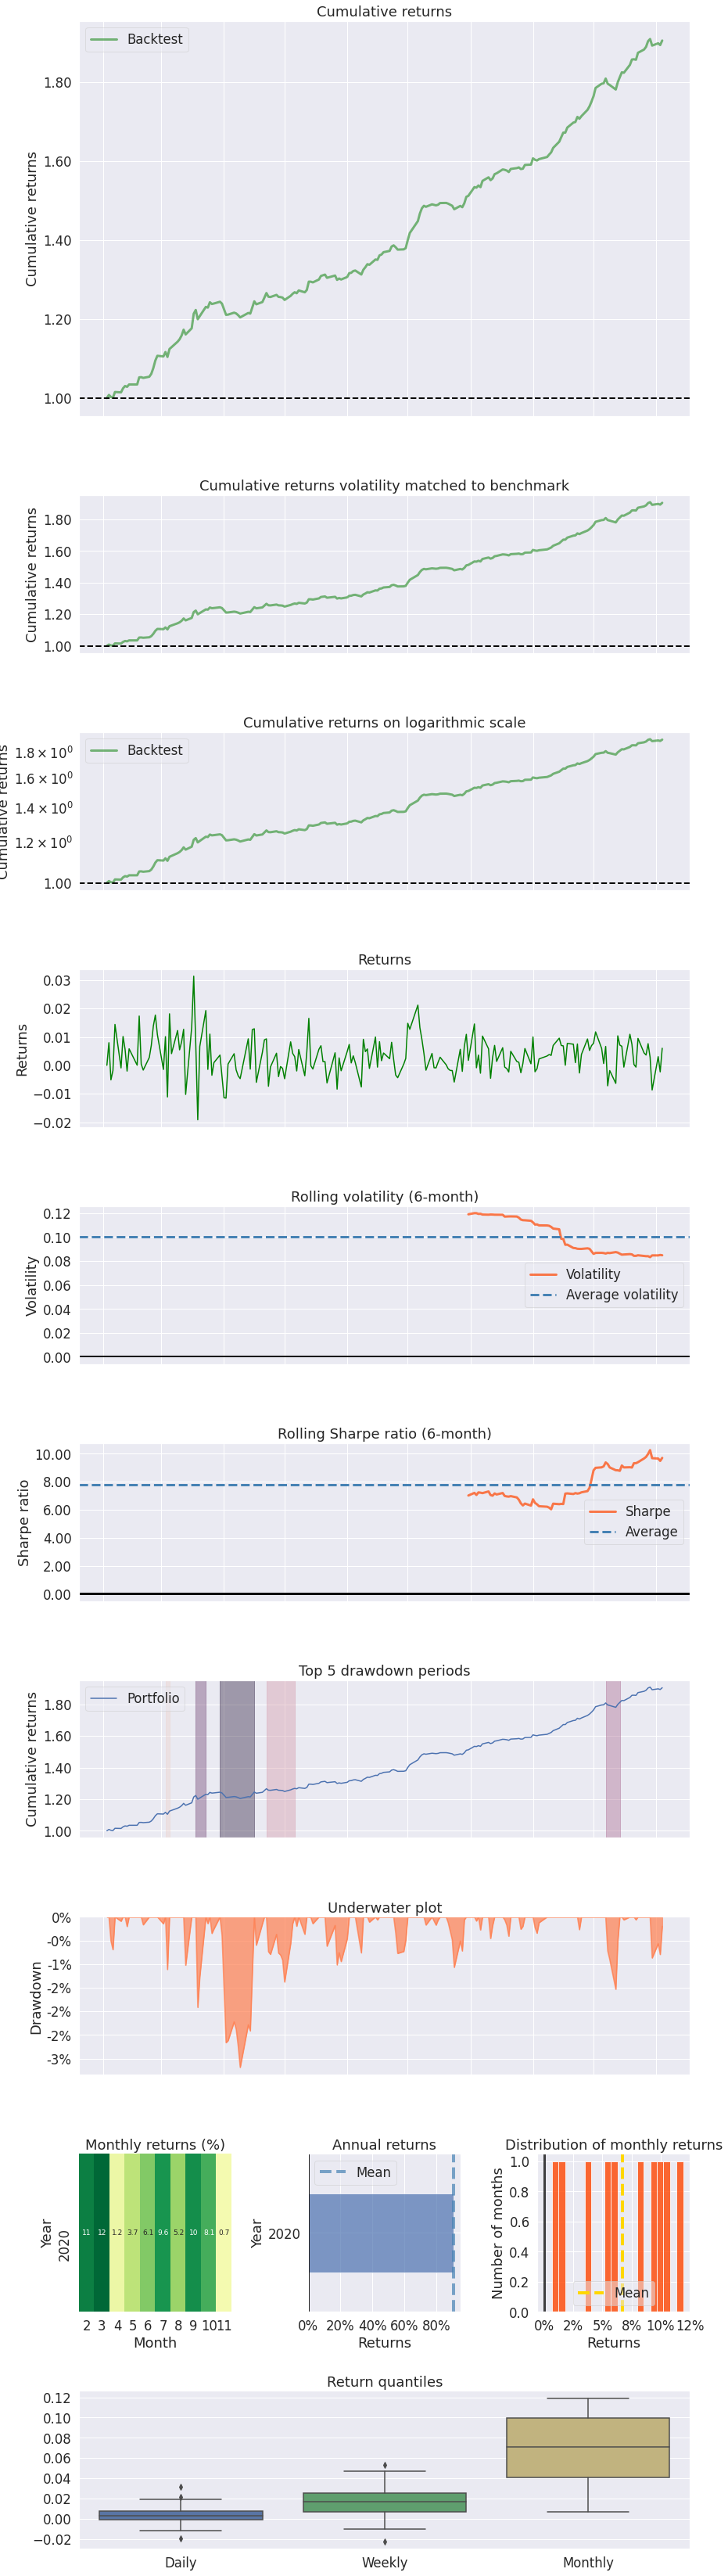

In [68]:
import pyfolio as pf
pf.create_returns_tear_sheet(r.returns_history)


In [70]:
if True:
    r.save_most_recent_allocation("./allocations/", leverage=1.8)